In [1]:
import pandas as pd
import numpy as np 
import pycwt as wavelet
import pycwt as cwt
from pycwt.helpers import find
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error,mean_squared_log_error, r2_score

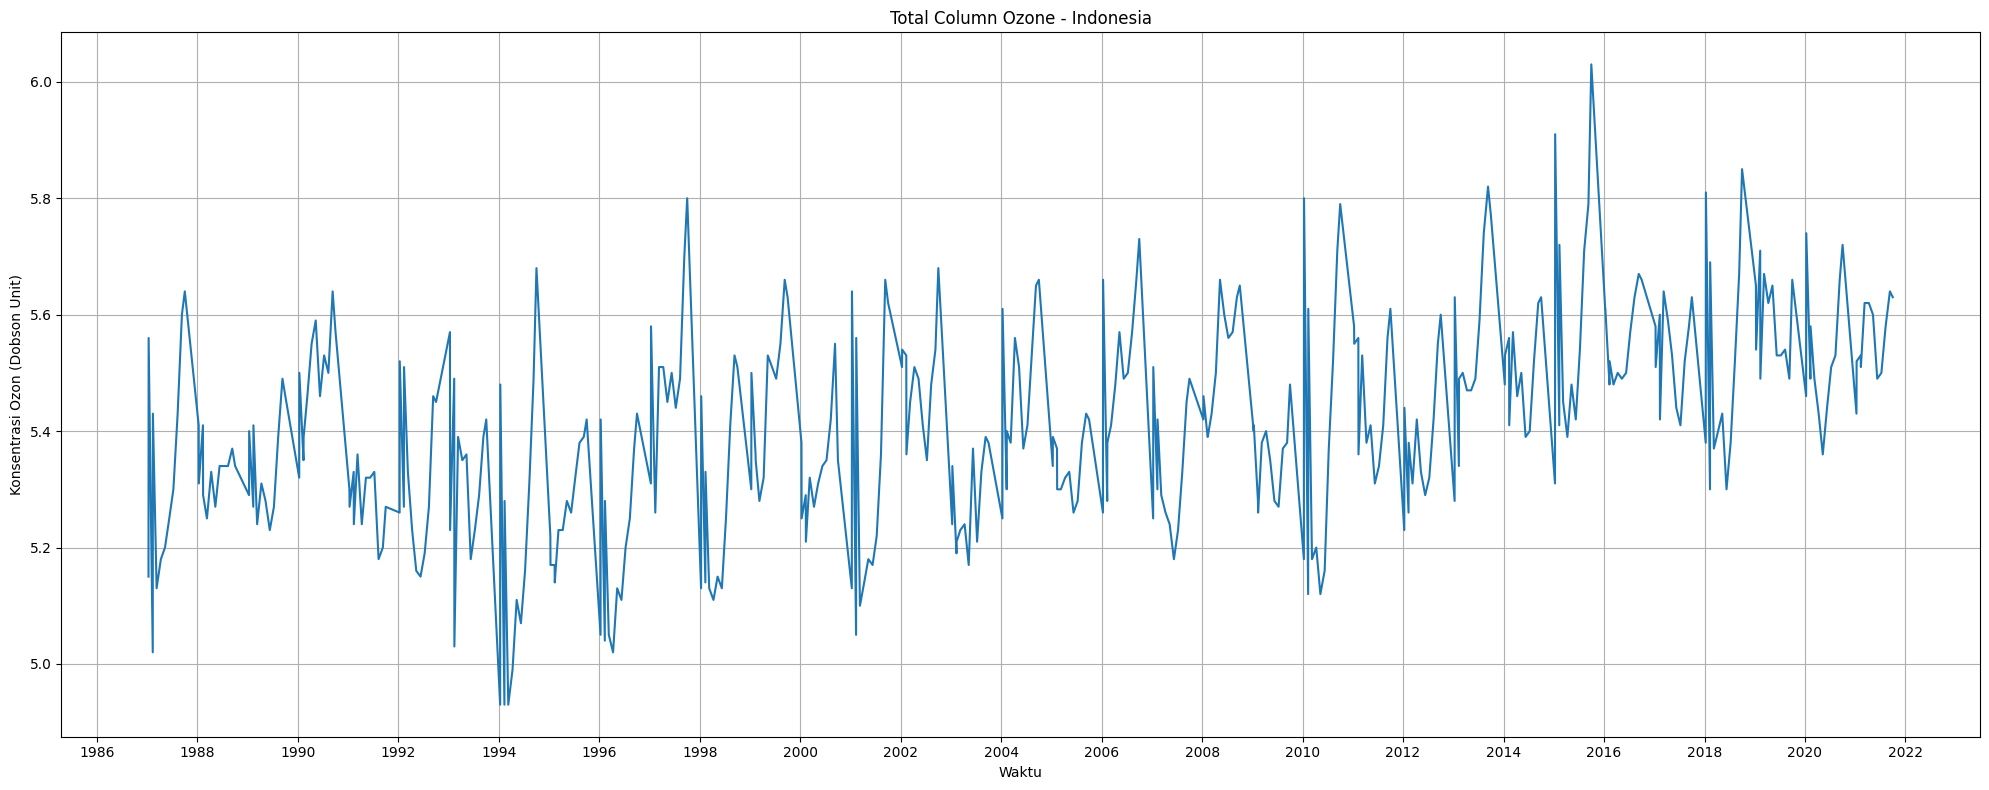

In [2]:
# Baca data dari file Excel
file_path = 'Total Column Ozone.xlsx'
df = pd.read_excel(file_path)

# Ubah kolom 'Date' ke format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%Y')

# Urutkan berdasarkan tanggal (ini penting!)
df = df.sort_values(by='Date')

# Buat grafik plot dari data
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['TCO'], linestyle='-')
plt.title('Total Column Ozone - Indonesia')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi Ozon (Dobson Unit)')
plt.grid(True)

# Format x-axis agar tampil tiap 2 tahun
locator = mdates.YearLocator(2)
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Tampilkan plot
plt.tight_layout()
plt.show()

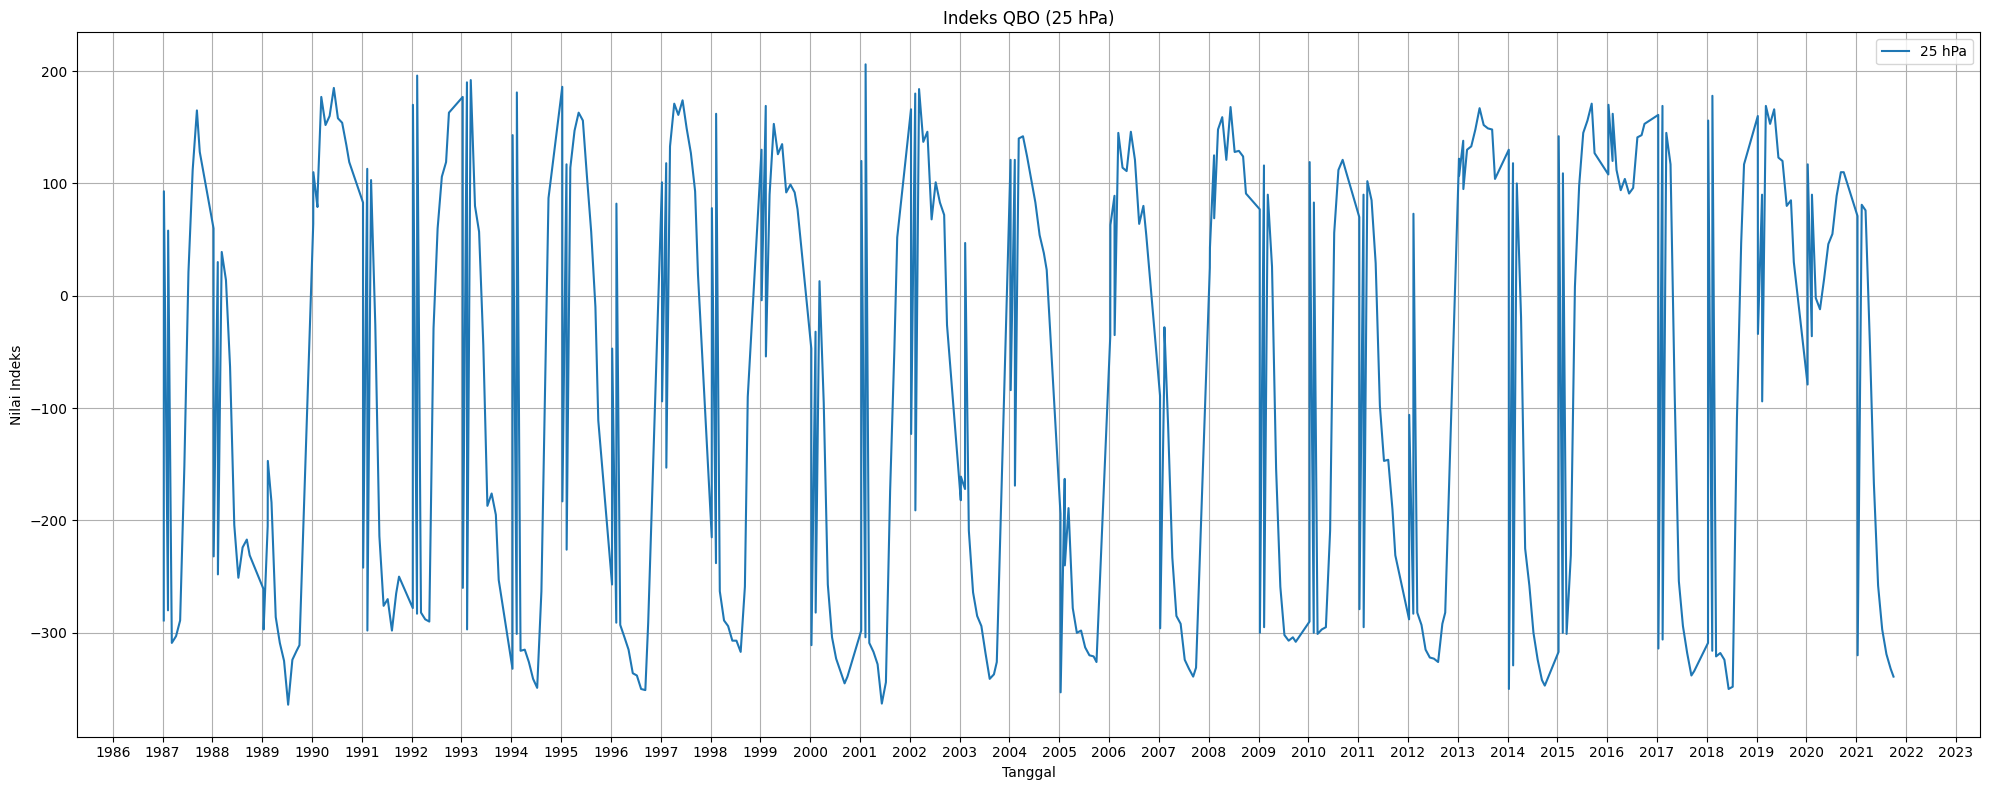

In [3]:
# Load data dari file Excel
file_path2 = 'QBO Data.xlsx'
df2 = pd.read_excel(file_path2)

# Ubah kolom 'Date' ke format datetime
df2['Date'] = pd.to_datetime(df2['Date'], format='%d%m%Y')

# Urutkan berdasarkan tanggal (ini penting!)
df2 = df2.sort_values(by='Date')

# Filter data dari tahun 1990 sampai 2021
start_date2 = '1987-01-01'
end_date2 = '2021-12-01'
df_filtered2 = df2[(df2['Date'] >= start_date2) & (df2['Date'] <= end_date2)]

# Plot data QBO 25 hPa
plt.figure(figsize=(20, 8))
plt.plot(df_filtered2['Date'], df_filtered2['25 hPa'], label='25 hPa', linestyle='-')

# Format x-axis agar tampil tiap 2 tahun
locator = mdates.YearLocator(1)  # Setiap 2 tahun
formatter = mdates.DateFormatter('%Y')

plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Indeks QBO (25 hPa)')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Indeks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

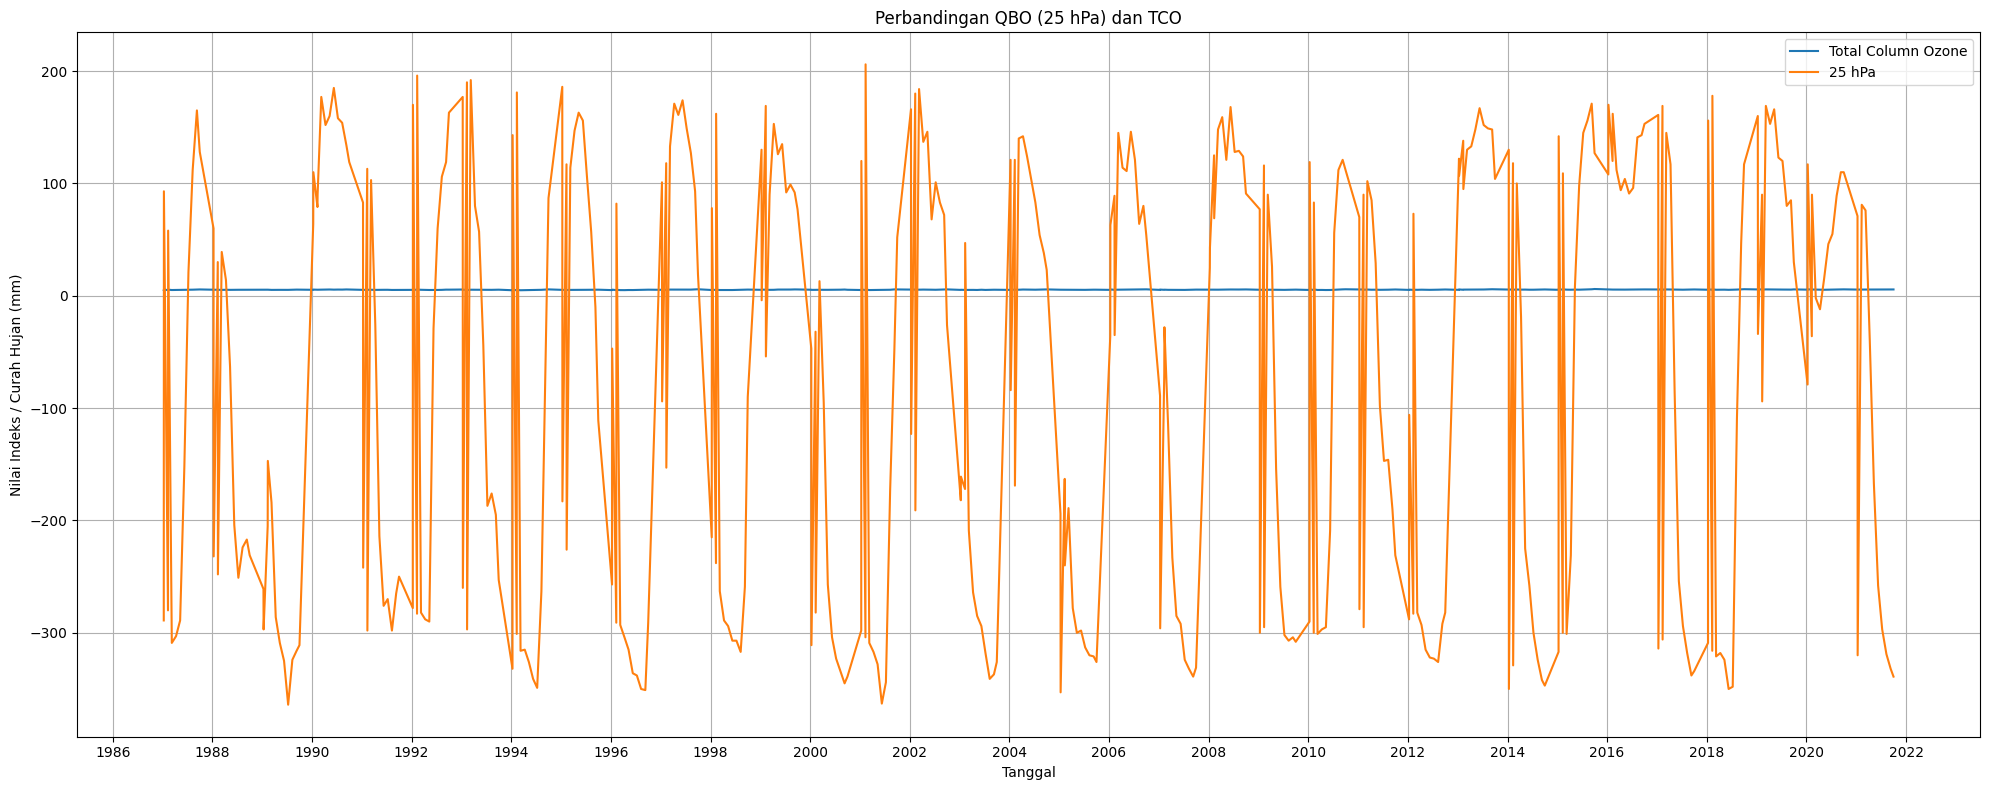

In [4]:
# ===== BACA DATA TOTAL COLUMN OZONE =====
file_path = 'Total Column Ozone.xlsx'
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%Y')
df = df.sort_values(by='Date')


# ===== BACA DATA QBO =====
file_path2 = 'QBO Data.xlsx'
df2 = pd.read_excel(file_path2)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d%m%Y')
df2 = df2.sort_values(by='Date')
df_filtered2 = df2[(df2['Date'] >= '1987-01-01') & (df2['Date'] <= '2021-12-01')]

# ===== PLOT GABUNGAN =====
plt.figure(figsize=(20, 8))

# Curah hujan
plt.plot(df['Date'], df['TCO'], label='Total Column Ozone', linestyle='-')

# QBO 25 hPa
plt.plot(df_filtered2['Date'], df_filtered2['25 hPa'], label='25 hPa', linestyle='-')

# Format x-axis agar tampil tiap 2 tahun
locator = mdates.YearLocator(2)
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Perbandingan QBO (25 hPa) dan TCO')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Indeks / Curah Hujan (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

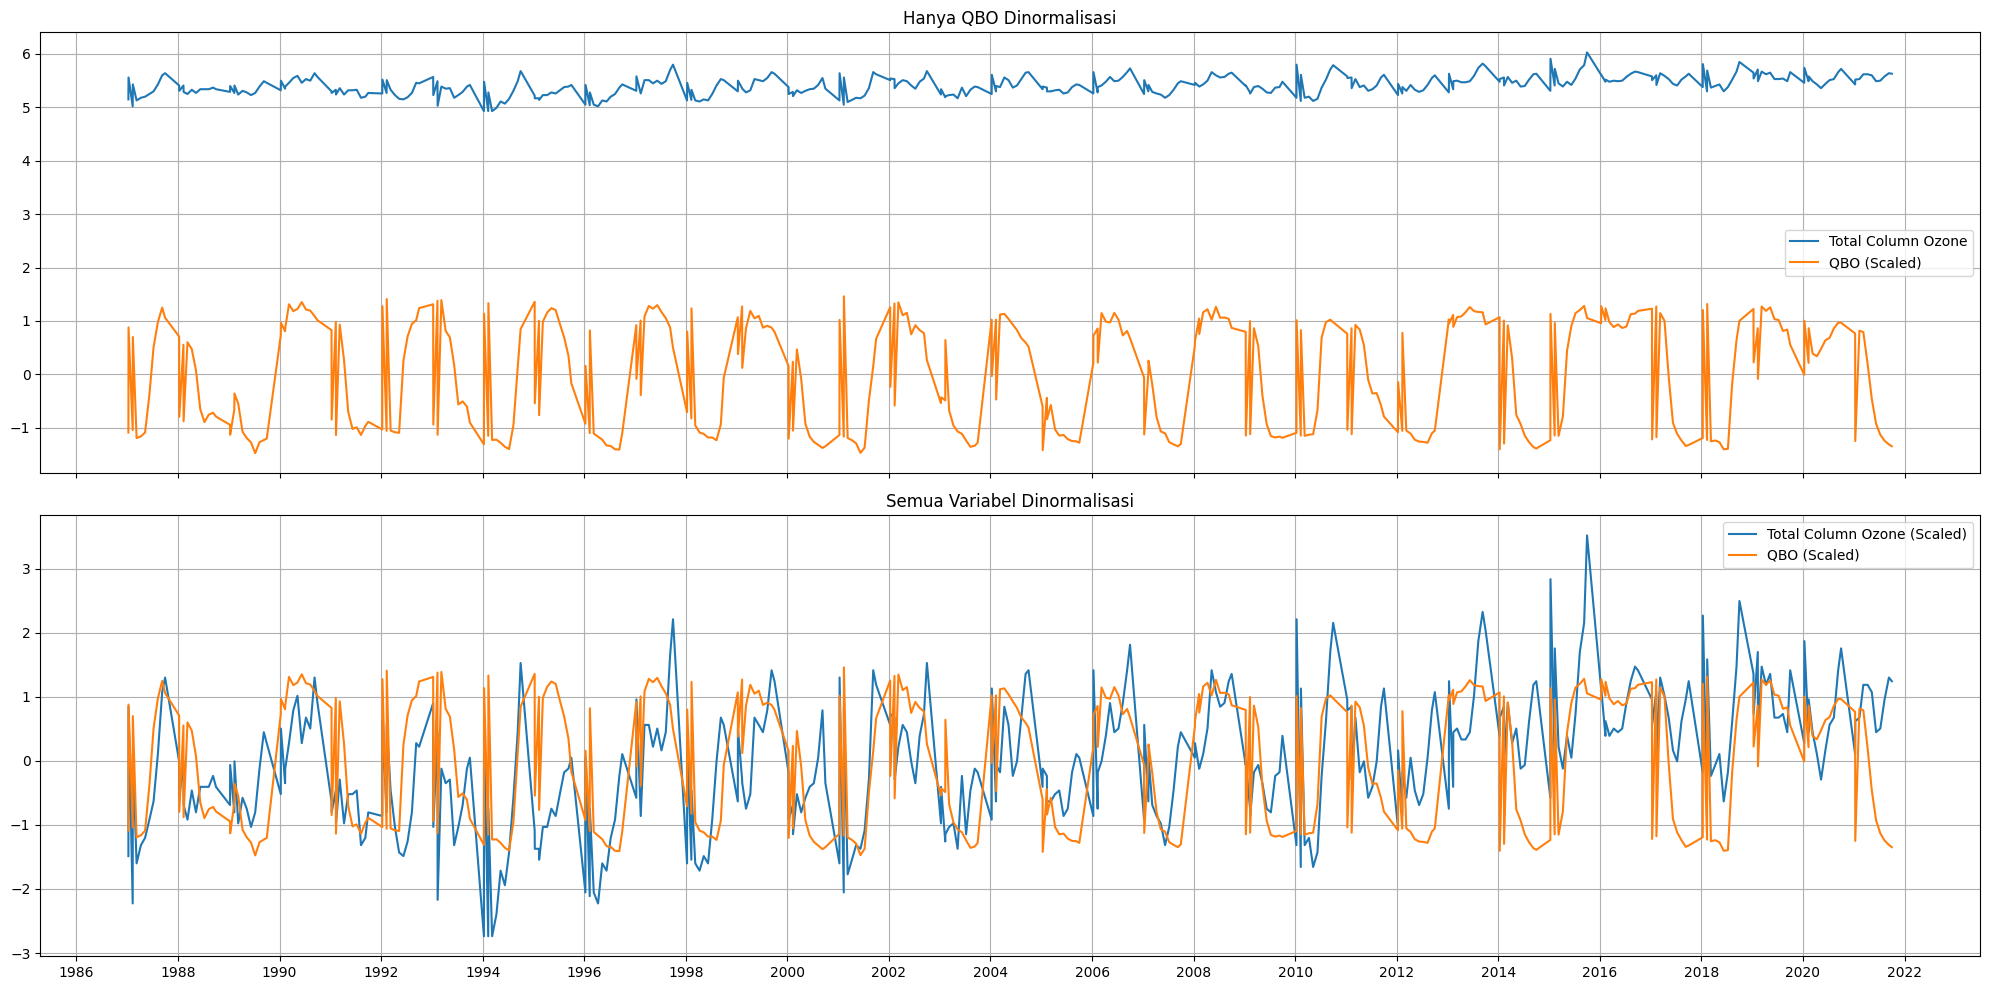

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- BACA DATA ---
# df: Total Column Ozone (TCO)
df = pd.read_excel('Total Column Ozone.xlsx')
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%Y')
df = df.sort_values(by='Date')

# df2: QBO
df2 = pd.read_excel('QBO Data.xlsx')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d%m%Y')
df2 = df2.sort_values(by='Date')
df2 = df2[(df2['Date'] >= '1987-01-01') & (df2['Date'] <= '2021-12-01')]
df2.rename(columns={'25 hPa': 'QBO'}, inplace=True)

# --- MERGE DATA ---
merged_df = pd.merge(df, df2[['Date', 'QBO']], on='Date', how='inner')

# --- NORMALISASI ---
# Normalisasi hanya QBO
scaler_qbo = StandardScaler()
merged_df['QBO_scaled'] = scaler_qbo.fit_transform(merged_df[['QBO']])

# Normalisasi semua variabel (Curah Hujan = 'TCO')
scaler_all = StandardScaler()
merged_df[['TCO_scaled', 'QBO_all_scaled']] = scaler_all.fit_transform(
    merged_df[['TCO', 'QBO']]
)

# --- PLOT ---
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Hanya QBO dinormalisasi
axes[0].plot(merged_df['Date'], merged_df['TCO'], label='Total Column Ozone')
axes[0].plot(merged_df['Date'], merged_df['QBO_scaled'], label='QBO (Scaled)')
axes[0].set_title("Hanya QBO Dinormalisasi")
axes[0].legend()
axes[0].grid(True)

# Semua dinormalisasi
axes[1].plot(merged_df['Date'], merged_df['TCO_scaled'], label='Total Column Ozone (Scaled)')
axes[1].plot(merged_df['Date'], merged_df['QBO_all_scaled'], label='QBO (Scaled)')
axes[1].set_title("Semua Variabel Dinormalisasi")
axes[1].legend()
axes[1].grid(True)

# Format x-axis tiap 2 tahun
locator = mdates.YearLocator(2)
formatter = mdates.DateFormatter('%Y')
axes[1].xaxis.set_major_locator(locator)
axes[1].xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

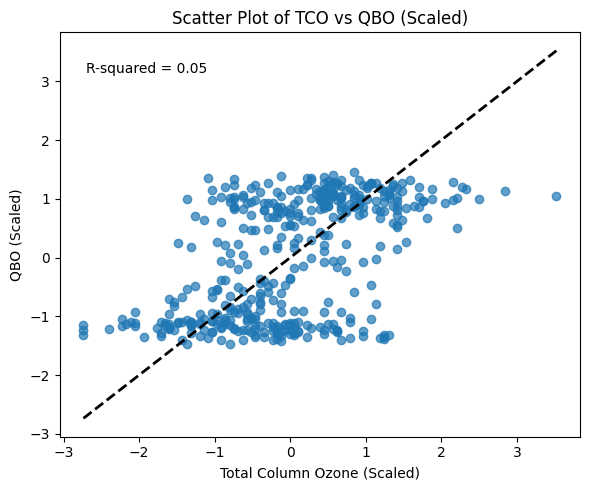

In [6]:
# --- HITUNG DAN PLOT SCATTER R-SQUARED (Semua Variabel Dinormalisasi) ---
from sklearn.metrics import r2_score

# Gunakan hasil normalisasi pada kedua variabel
x = merged_df['TCO_scaled']
y = merged_df['QBO_all_scaled']
r2 = r2_score(x, y)

plt.figure(figsize=(6, 5))
plt.scatter(x, y, alpha=0.7)
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=2)
plt.xlabel('Total Column Ozone (Scaled)')
plt.ylabel('QBO (Scaled)')
plt.title('Scatter Plot of TCO vs QBO (Scaled)')
plt.text(0.05, 0.9, f'R-squared = {r2:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

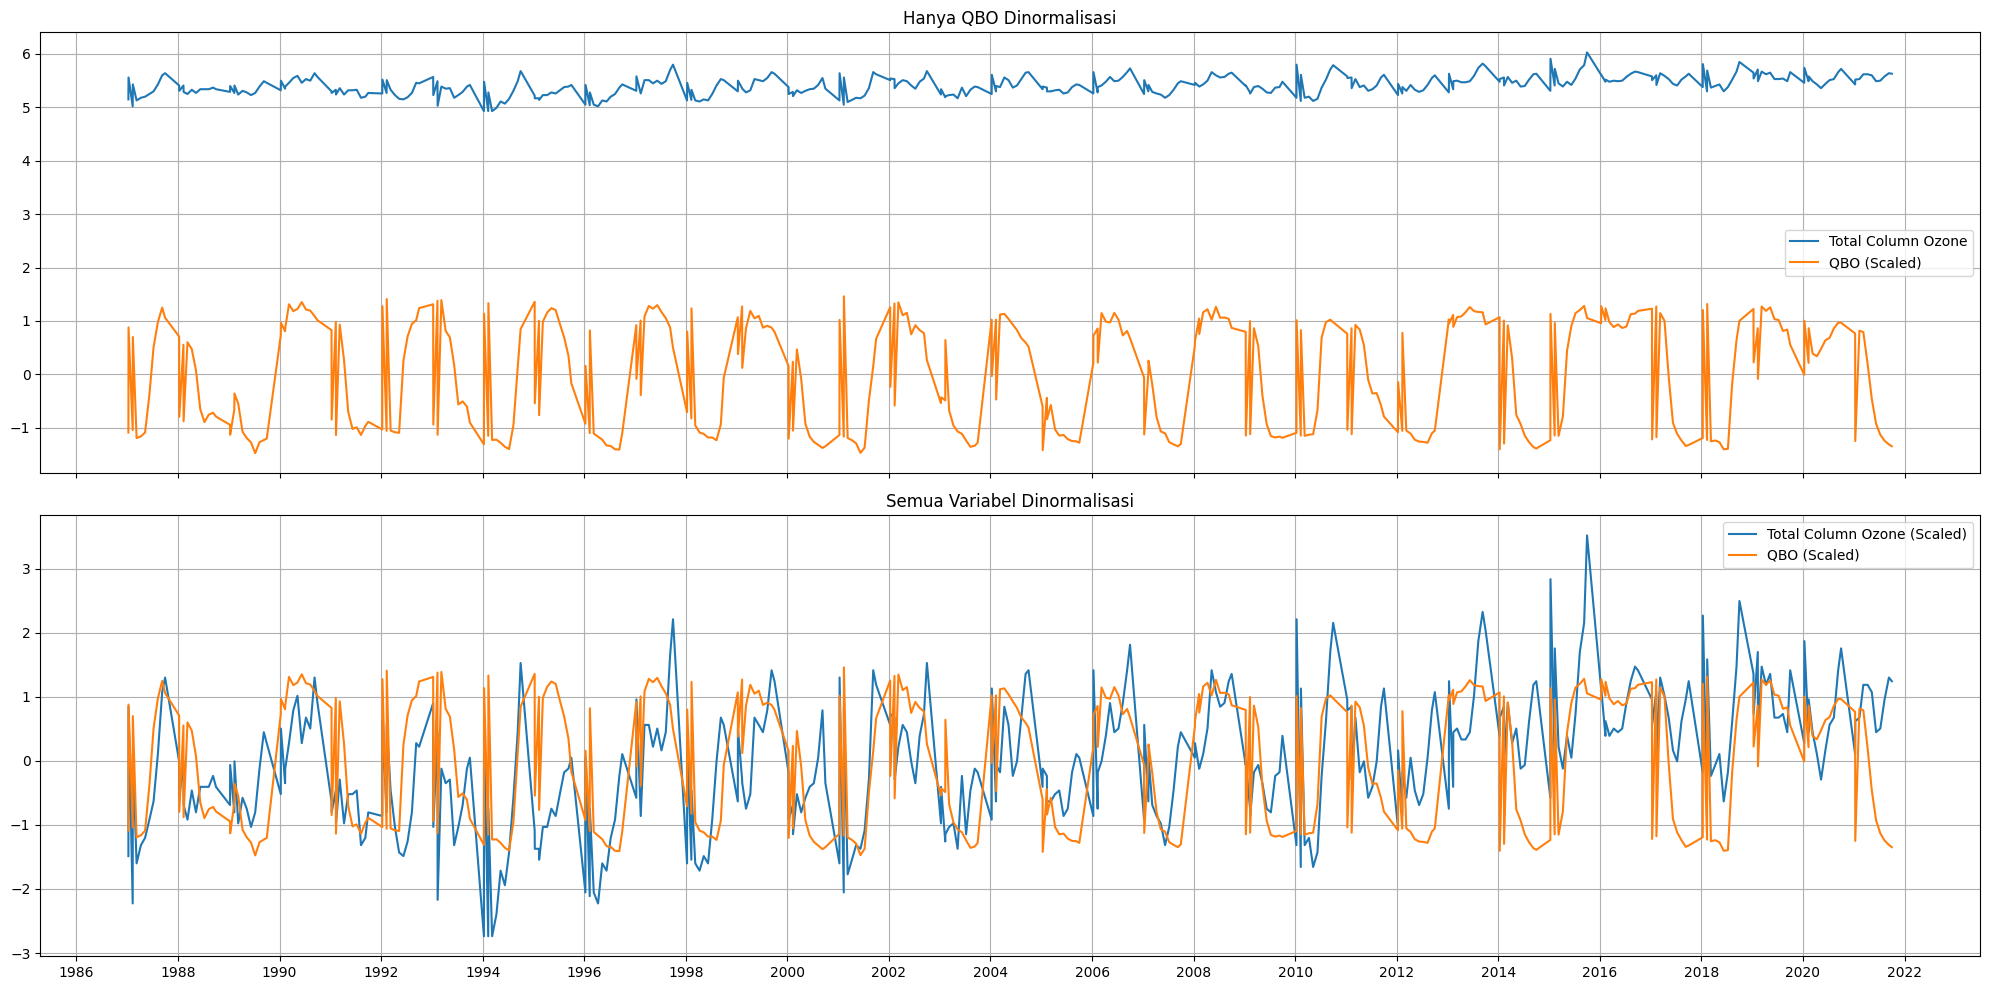

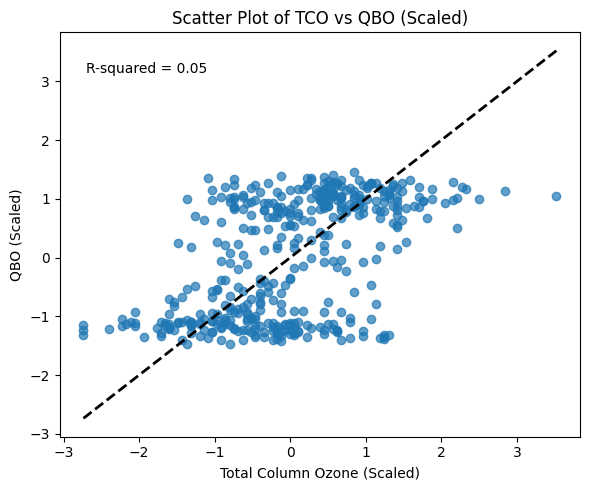

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import r2_score

# --- BACA DATA ---
# df: Total Column Ozone (TCO)
df = pd.read_excel('Total Column Ozone.xlsx')
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%Y')
df = df.sort_values(by='Date')

# df2: QBO
df2 = pd.read_excel('QBO Data.xlsx')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d%m%Y')
df2 = df2.sort_values(by='Date')
df2 = df2[(df2['Date'] >= '1987-01-01') & (df2['Date'] <= '2021-12-01')]
df2.rename(columns={'25 hPa': 'QBO'}, inplace=True)

# --- MERGE DATA ---
merged_df = pd.merge(df, df2[['Date', 'QBO']], on='Date', how='inner')

# --- NORMALISASI ---
# Normalisasi hanya QBO
scaler_qbo = StandardScaler()
merged_df['QBO_scaled'] = scaler_qbo.fit_transform(merged_df[['QBO']])

# Normalisasi semua variabel (Curah Hujan = 'TCO')
scaler_all = StandardScaler()
merged_df[['TCO_scaled', 'QBO_all_scaled']] = scaler_all.fit_transform(
    merged_df[['TCO', 'QBO']]
)

# --- PLOT GRAFIK SEPERTI BIASA ---
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Hanya QBO dinormalisasi
axes[0].plot(merged_df['Date'], merged_df['TCO'], label='Total Column Ozone')
axes[0].plot(merged_df['Date'], merged_df['QBO_scaled'], label='QBO (Scaled)')
axes[0].set_title("Hanya QBO Dinormalisasi")
axes[0].legend()
axes[0].grid(True)

# Semua dinormalisasi
axes[1].plot(merged_df['Date'], merged_df['TCO_scaled'], label='Total Column Ozone (Scaled)')
axes[1].plot(merged_df['Date'], merged_df['QBO_all_scaled'], label='QBO (Scaled)')
axes[1].set_title("Semua Variabel Dinormalisasi")
axes[1].legend()
axes[1].grid(True)

# Format x-axis tiap 2 tahun
locator = mdates.YearLocator(2)
formatter = mdates.DateFormatter('%Y')
axes[1].xaxis.set_major_locator(locator)
axes[1].xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# --- HITUNG DAN PLOT SCATTER R-SQUARED (Semua Variabel Dinormalisasi) ---
from sklearn.metrics import r2_score

# Gunakan hasil normalisasi pada kedua variabel
x = merged_df['TCO_scaled']
y = merged_df['QBO_all_scaled']
r2 = r2_score(x, y)

plt.figure(figsize=(6, 5))
plt.scatter(x, y, alpha=0.7)
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=2)
plt.xlabel('Total Column Ozone (Scaled)')
plt.ylabel('QBO (Scaled)')
plt.title('Scatter Plot of TCO vs QBO (Scaled)')
plt.text(0.05, 0.9, f'R-squared = {r2:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

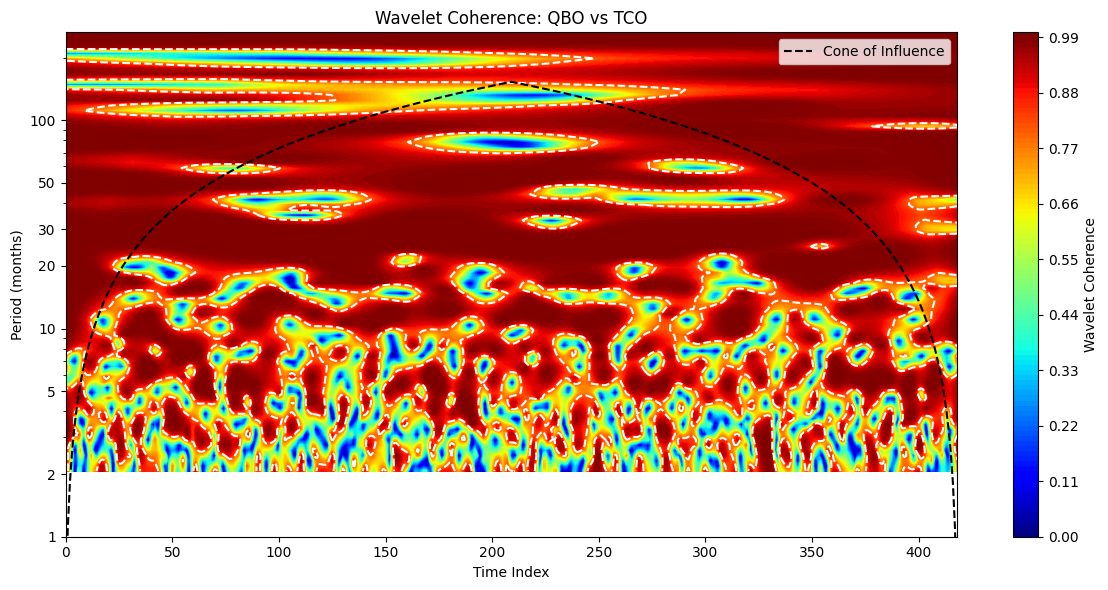

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycwt import wavelet

# --- BACA DATA ---
df3 = pd.read_excel("Data Gabungan.xlsx")
df3['Date'] = pd.to_datetime(df3['Date'])
df3.set_index('Date', inplace=True)

# Ambil data
tco = df3['TCO'].values
qbo = df3['QBO'].values
time = df3.index.to_pydatetime()

# Filter NaN (pastikan dua variabel saja)
valid = ~np.isnan(tco) & ~np.isnan(qbo)
tco = tco[valid]
qbo = qbo[valid]
time = np.array(time)[valid]

# Normalisasi
def normalize(x): return (x - np.mean(x)) / np.std(x)
tco = normalize(tco)
qbo = normalize(qbo)

# Fungsi smoothing wavelet
def smooth_wavelet(W, dt, dj, scales):
    import scipy.signal
    m, n = W.shape
    wavelet_avg = scipy.signal.convolve2d(W, np.ones((1, 5))/5, mode='same')  # smoothing time
    for i in range(m):
        s = int(np.round(scales[i] / dt))
        if s > 1:
            kernel = np.ones((s, 1)) / s
            wavelet_avg[i, :] = scipy.signal.convolve(wavelet_avg[i, :], kernel[:, 0], mode='same')
    return wavelet_avg

# Fungsi hitung dan plot WTC
def compute_wtc(x, y, label, sig_threshold=0.8):
    dt = 1
    dj = 1/12
    s0 = 2 * dt
    J = 7 / dj
    mother = wavelet.Morlet()
    Wx, scales, freqs, coi, _, _ = wavelet.cwt(x, dt, dj, s0, J, mother)
    Wy, _, _, _, _, _ = wavelet.cwt(y, dt, dj, s0, J, mother)
    Wxy = Wx * np.conj(Wy)

    Sx = smooth_wavelet(np.abs(Wx) ** 2 / scales[:, None], dt, dj, scales)
    Sy = smooth_wavelet(np.abs(Wy) ** 2 / scales[:, None], dt, dj, scales)
    Sxy = smooth_wavelet(Wxy / scales[:, None], dt, dj, scales)

    WTC = np.abs(Sxy) ** 2 / (Sx * Sy)

    t = np.arange(len(x))
    period = 1 / freqs

    plt.figure(figsize=(12, 6))
    plt.contourf(t, period, WTC, 100, cmap='jet', vmax=0.99)
    plt.colorbar(label='Wavelet Coherence')
    plt.contour(t, period, WTC, levels=[sig_threshold], colors='white', linewidths=1.5, linestyles='dashed')
    plt.plot(t, coi, 'k--', label='Cone of Influence')
    plt.yscale('log')
    plt.ylim([1, max(period)])
    plt.yticks([1, 2, 5, 10, 20, 30, 50, 100], ['1', '2', '5', '10', '20', '30', '50', '100'])
    plt.xlabel('Time Index')
    plt.ylabel('Period (months)')
    plt.title(f'Wavelet Coherence: {label}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Hitung dan tampilkan WTC (TCO vs QBO)
compute_wtc(qbo, tco, 'QBO vs TCO')